In [1]:
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
# import pyrosetta
import os
import csv
import sys

print(sys.version)

sns.set(style="whitegrid")

3.7.2 (default, Jan 13 2019, 12:50:15) 
[Clang 10.0.0 (clang-1000.11.45.5)]


In [2]:
def load_csv(file_name):
    data = {}
    with open(file_name) as f:
        reader = csv.reader(f)
        for line in reader:
            pname, cname, best_energy, best_rmsd, mean_energy, stddev_energy = line
            if pname not in data.keys():
                data[pname] = {}
            if cname not in data[pname].keys():
                data[pname][cname] = {}
            
            data[pname][cname]['best_energy'] = float(best_energy)
            data[pname][cname]['best_rmsd'] = float(best_rmsd)
            data[pname][cname]['mean_energy'] = float(mean_energy)
            data[pname][cname]['stddev_energy'] = float(stddev_energy)
            
    return data

In [3]:
# data = load_csv('data-own.csv')

In [4]:
data = pd.read_csv('data-own.csv', names=['protein', 'cname', 'best_energy', 'best_rmsd', 'mean_energy', 'stddev_energy'])
data

,protein,cname,best_energy,best_rmsd,mean_energy,stddev_energy
0,1zdd,SADE-DE,-52.05,2.91,-28.46,19.12
1,1zdd,SADE-DE-MC,-73.33,2.43,-38.92,19.18
2,1zdd,SADE-DE-REMC,-78.19,1.58,-41.81,20.02
3,1zdd,SADE-MC,-81.72,1.25,-68.42,7.44
4,1zdd,SADE-REMC,-84.90,1.27,-66.73,7.11
5,1crn,SADE-DE,-32.26,6.01,5.87,26.70
6,1crn,SADE-DE-MC,-74.64,4.60,-45.34,16.55
7,1crn,SADE-DE-REMC,-82.38,4.69,-47.56,20.87
8,1crn,SADE-MC,-82.04,5.18,-59.80,12.68
9,1crn,SADE-REMC,-86.18,3.16,-60.58,10.56


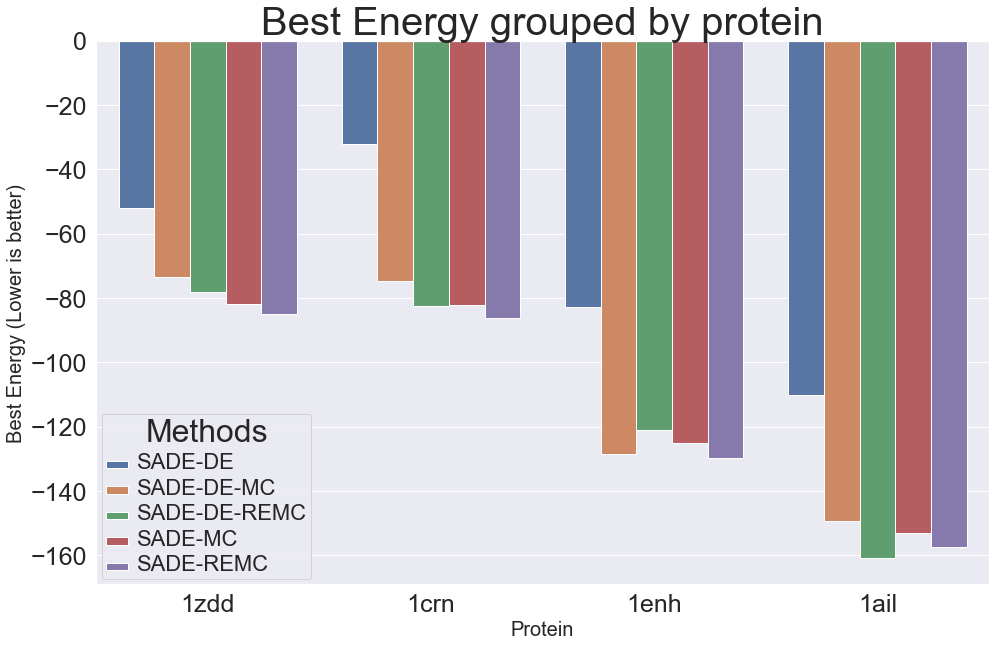

In [5]:
sns.set(rc={'figure.figsize':(16, 10)})

plot = sns.barplot(x='protein', y='best_energy', hue='cname', data=data)
plot.set_title('Best Energy grouped by protein', fontsize=40)
plot.set_ylabel('Best Energy (Lower is better)', fontsize=20)
plot.set_xlabel('Protein', fontsize=20)
plot.tick_params(labelsize=25)

plt.setp(plot.get_legend().get_texts(), fontsize='22')
plt.setp(plot.get_legend().get_title(), fontsize='32')

plot.get_legend().set_title('Methods')

plot.get_figure().savefig('exp1_best_energy.png')

plot

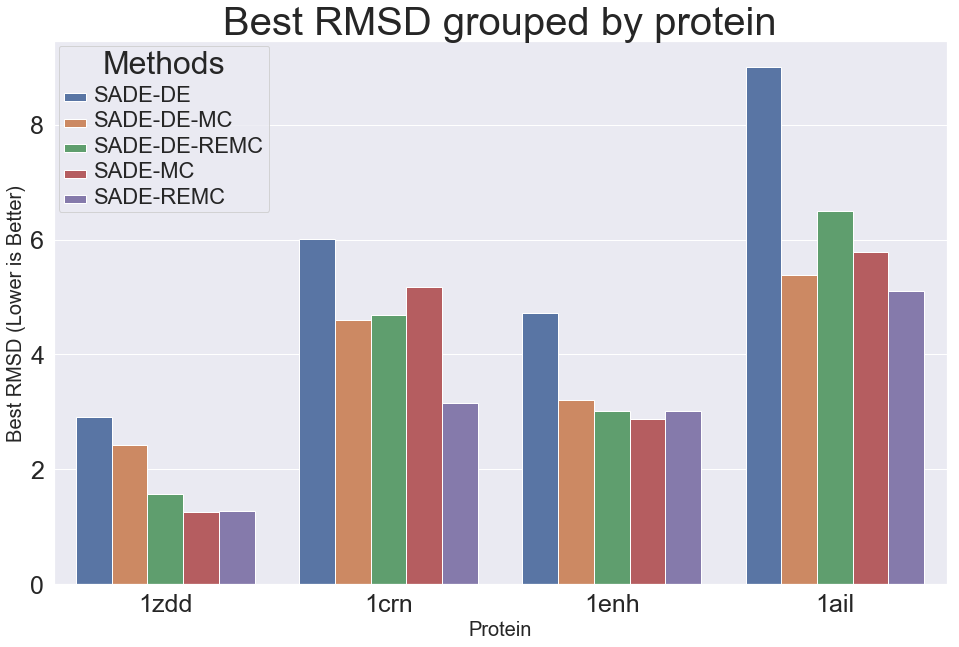

In [6]:
plot = sns.barplot(x='protein', y='best_rmsd', hue='cname', data=data)
plot.set_title('Best RMSD grouped by protein', fontsize=40)
plot.set_ylabel('Best RMSD (Lower is Better)', fontsize=20)
plot.set_xlabel('Protein', fontsize=20)
plot.tick_params(labelsize=25)

plt.setp(plot.get_legend().get_texts(), fontsize='22')
plt.setp(plot.get_legend().get_title(), fontsize='32')

plot.get_legend().set_title('Methods')

plot.get_figure().savefig('exp1_best_rmsd.png')

plot

gambi =  0
err =  4 [19.12 26.7  60.   14.12]
data =  4 [-28.46, 5.87, -24.6, -86.51]

gambi =  1
err =  4 [19.18 16.55 16.66 19.85]
data =  4 [-38.92, -45.34, -101.42, -110.1]

gambi =  2
err =  4 [20.02 20.87 12.64 23.46]
data =  4 [-41.81, -47.56, -97.77, -106.23]

gambi =  3
err =  4 [ 7.44 12.68  9.29 13.81]
data =  4 [-68.42, -59.8, -107.7, -122.62]

gambi =  4
err =  4 [ 7.11 10.56  9.23 12.05]
data =  4 [-66.73, -60.58, -105.13, -126.36]



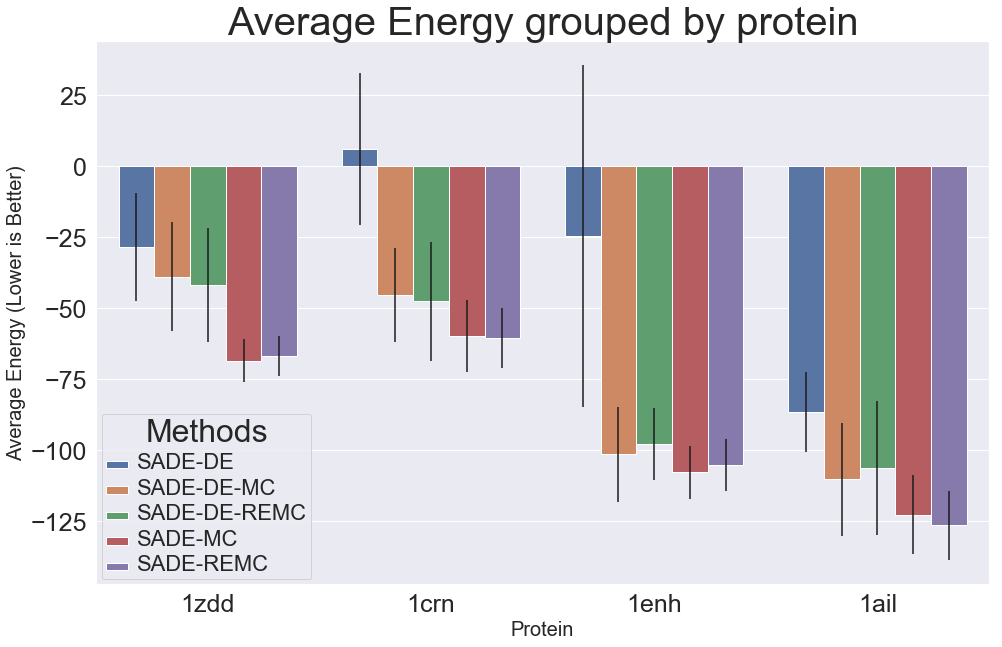

In [7]:
plot = sns.barplot(x='protein', y='mean_energy', hue='cname', yerr=np.asarray(data['stddev_energy']), data=data)
plot.set_title('Average Energy grouped by protein', fontsize=40)
plot.set_ylabel('Average Energy (Lower is Better)', fontsize=20)
plot.set_xlabel('Protein', fontsize=20)
plot.tick_params(labelsize=25)

plt.setp(plot.get_legend().get_texts(), fontsize='22')
plt.setp(plot.get_legend().get_title(), fontsize='32')

plot.get_legend().set_title('Methods')

plot.get_figure().savefig('exp1_mean_energy.png')

plot